# *Hypothesis Testing on the Population count data of Punjab districts from 1901 TO 2011*


In [1]:
# Necessary libraries imported
import pandas as pd
import numpy as np
from scipy.stats import f_oneway, chi2_contingency, ttest_ind

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Population_cleaned.csv")

In [4]:
df.sample(5)

,Unnamed: 0,State/Union Territory/District,Census Year,Persons,Absolute change since previous census,Percentage change since previous census,Males,Females
244,262,Barnala,1941,NaN,NaN,NaN,NaN,NaN
96,102,Moga,1901,NaN,NaN,NaN,NaN,NaN
159,170,Mansa,1931,NaN,NaN,NaN,NaN,NaN
247,265,Barnala,1971,292463.0,50095.0,20.668983,158673.0,133790.0
160,171,Mansa,1941,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 8 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               252 non-null    int64  
 1   State/Union Territory/District           252 non-null    object 
 2   Census Year                              252 non-null    int64  
 3   Persons                                  202 non-null    float64
 4   Absolute change since previous census    181 non-null    float64
 5   Percentage change since previous census  181 non-null    float64
 6   Males                                    202 non-null    float64
 7   Females                                  202 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 15.9+ KB


- The census record of 8 princely States, which were merged into the former PEPSU in 1948, was not available for the previous decades. 
 - In the result it was not possible to build up  comparative figures of four districts of PEPSU i.e. Kapurthala, Patiala, Sangrur and Bhatinda, for the period from 1901 to 1941. Also Barnala district population figures were not available from 1901 to 1951.
 - District formed after 2001 census are Barnala, Tarn Taran and Sahibzada Ajit Singh Nagar.
 

## Lets do hypothesis testing for census years 1951 to 2011 for all districts.  

In [6]:
df_filtered = df[(df['Census Year'] >= 1951) & (df['Census Year'] <= 2011)]


In [7]:
df_filtered["Census Year"].value_counts()

Census Year
1951    21
1961    21
1971    21
1981    21
1991    21
2001    21
2011    21
Name: count, dtype: int64

In [8]:
df_filtered.isna().sum()

Unnamed: 0                                  0
State/Union Territory/District              0
Census Year                                 0
Persons                                     0
Absolute change since previous census      10
Percentage change since previous census    10
Males                                       0
Females                                     0
dtype: int64

In [9]:
df_filtered.rename(columns={'State/Union Territory/District': 'District'}, inplace=True)

- The missing values are of the absolute and percentage change since previous census for the year 1951 for districts mentioned above.


### Hypothesis testing for: Population Growth Rate Across Decades (ANOVA Test)

- **Null Hypothesis (H0):** There is no significant difference in the population growth rate across different decades.
- **Alternative Hypothesis (H1):** There is a significant difference in the population growth rate across different decades.

**ANOVA works by comparing the variance (spread) within each group (e.g., growth rates within a district or decade) to the variance between the groups (e.g., growth rates across different districts or decades)**

In [10]:
# Calculate decade-wise population growth rate
df_filtered['Decade'] = (df_filtered['Census Year'] // 10) * 10




In [11]:
df_filtered["Decade"].value_counts()

Decade
1950    21
1960    21
1970    21
1980    21
1990    21
2000    21
2010    21
Name: count, dtype: int64

In [12]:
# Calculate Growth Rate for 1951 to 2011
df_filtered.loc[:, 'Growth Rate'] = df_filtered.groupby('District')['Persons'].pct_change() * 100



In [13]:
# Fill NaN values (for 1951) using manual calculation
for district in df_filtered['District'].unique():
    # Get 1951 and 1961 population for the district
    pop_1951 = df_filtered[(df_filtered['District'] == district) & (df_filtered['Census Year'] == 1951)]['Persons'].values[0]
    pop_1961 = df_filtered[(df_filtered['District'] == district) & (df_filtered['Census Year'] == 1961)]['Persons'].values[0]
    
    # Calculate the growth rate from 1951 to 1961
    growth_rate_1951 = ((pop_1961 - pop_1951) / pop_1951) * 100
    
    # Assign this value to the Growth Rate column for 1951
    df_filtered.loc[(df_filtered['District'] == district) & (df_filtered['Census Year'] == 1951), 'Growth Rate'] = growth_rate_1951



In [14]:
# Display the updated DataFrame
print(df_filtered)

     Unnamed: 0 District  Census Year     Persons  \
5             7   PUNJAB         1951   9160500.0   
6             8   PUNJAB         1961  11135069.0   
7             9   PUNJAB         1971  13551060.0   
8            10   PUNJAB         1981  16788915.0   
9            11   PUNJAB         1991  20281969.0   
..          ...      ...          ...         ...   
247         265  Barnala         1971    292463.0   
248         266  Barnala         1981    362663.0   
249         267  Barnala         1991    440772.0   
250         268  Barnala         2001    526931.0   
251         269  Barnala         2011    595527.0   

     Absolute change since previous census  \
5                                -439736.0   
6                                1974569.0   
7                                2415991.0   
8                                3237855.0   
9                                3493054.0   
..                                     ...   
247                                50095.

In [15]:
df_filtered["Growth Rate"].isna().sum()

0

In [16]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 5 to 251
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               147 non-null    int64  
 1   District                                 147 non-null    object 
 2   Census Year                              147 non-null    int64  
 3   Persons                                  147 non-null    float64
 4   Absolute change since previous census    137 non-null    float64
 5   Percentage change since previous census  137 non-null    float64
 6   Males                                    147 non-null    float64
 7   Females                                  147 non-null    float64
 8   Decade                                   147 non-null    int64  
 9   Growth Rate                              147 non-null    float64
dtypes: float64(6), int64(3), object(1)
memory usage: 12.6+ 

In [17]:
df_filtered=df_filtered[df_filtered["Census Year"] != 1951]

In [18]:
df_filtered["Growth Rate"].describe()

count    126.000000
mean      20.519338
std        7.105672
min        4.228656
25%       16.307337
50%       19.795636
75%       24.522667
max       43.631847
Name: Growth Rate, dtype: float64

In [19]:
growth_rates_by_decade = df_filtered.groupby('Decade')['Growth Rate'].apply(list).dropna()

In [20]:
df_filtered.to_csv("hypothesis_data.csv")

In [21]:
#Performing ANOVA test
anova_result = f_oneway(*growth_rates_by_decade)

print("ANOVA Test for Population Growth Rate Across Decades")
print(f"F-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}")

ANOVA Test for Population Growth Rate Across Decades
F-statistic: 7.793558377624727, p-value: 2.2175706801038895e-06


## Inference drawn from the test:
- Using the ANOVA test : we get the p_value = 2.2175706801038895e-06 < 0.05.
- The null hypothesis is rejected , therefore there is a significant difference in population growth across different decades 1961 to 2011.

## To check if the growth rate is significant across different districts from 1961 to 2011.(ANOVA TEST)






In [22]:
# Group growth rates by district
districts = df_filtered['District'].unique()   # array of unique districts 
#  creates a list of Series, where each Series contains the Growth Rate values for a specific distric
growth_rates_by_district = [df_filtered[df_filtered['District'] == district]['Growth Rate'].dropna() for district in districts]

# Perform the one way ANOVA test
f_statistic, p_value = f_oneway(*growth_rates_by_district)

# Print the results
print(f"F-statistic: {f_statistic}") # f statistic is the ratio between groups variances to within group variances
print(f"P-value: {p_value}") # p-value indicates the probability that the observed differences between group means are due to random chance

# Interpretation
alpha = 0.05
if p_value <= alpha:
    print("Reject the null hypothesis: There is a significant difference in growth rates between districts.")
else:
    print("Fail to reject the null hypothesis: No significant difference in growth rates between districts.")

F-statistic: 3.16183802541241
P-value: 6.844309423661727e-05
Reject the null hypothesis: There is a significant difference in growth rates between districts.


## Lets work on districts sex ratio over the years and see what mystery lies in it.

In [23]:
df_sr = pd.read_csv("Sex ratio.csv") 

In [24]:
df_sr.head()

,State/Union Territory/District,Census Year,Persons,Absolute change since previous census,Percentage change since previous census,Males,Females,SexRatioCol,Growth Rate
0,Gurdaspur,1901,702372.0,NaN,NaN,378985.0,323387.0,853.3,0.0
1,Kapurthala,1901,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,Kapurthala,1911,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,Kapurthala,1921,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,Kapurthala,1931,NaN,NaN,NaN,NaN,NaN,NaN,0.0


### As we have missing data from 1901 to 1951 for the same reason mentioned above we choose to conduct analysis after independence from 1951 to 2011

In [28]:
df_sr = df_sr[(df_sr['Census Year'] >= 1951) & (df_sr['Census Year'] <= 2011)]


In [29]:
descriptive_stats = df_sr.groupby('Census Year')['SexRatioCol'].describe()
print(descriptive_stats)

             count      mean        std     min       25%      50%       75%  \
Census Year                                                                    
1951          20.0  841.1750  28.350596  773.42  823.2650  842.585  863.0875   
1961          20.0  850.5240  26.312183  815.32  830.0000  843.825  867.7200   
1971          20.0  862.6305  20.264538  831.10  849.2675  862.330  877.8775   
1981          20.0  876.5780  20.151950  839.74  864.8400  875.945  886.1250   
1991          20.0  881.8985  18.199074  844.23  870.7850  883.115  895.4850   
2001          20.0  879.6885  23.365254  824.02  870.8300  883.980  888.2400   
2011          20.0  897.1115  24.773718  868.31  882.2800  892.130  902.8100   

                max  
Census Year          
1951         880.38  
1961         901.66  
1971         899.30  
1981         918.55  
1991         924.31  
2001         935.26  
2011         961.08  


In [30]:
df_sr.rename(columns={'State/Union Territory/District': 'District'}, inplace=True)

In [31]:
# Pivot the data so that each census year is a column
pivoted_df = df_sr.pivot(index='District', columns='Census Year', values='SexRatioCol')

In [35]:
pivoted_df

Census Year,1951,1961,1971,1981,1991,2001,2011
District,,,,,,,
Amritsar,826.64,841.59,852.92,869.66,877.84,871.08,889.14
Barnala,817.29,836.75,843.18,866.02,870.53,871.91,875.55
Bathinda,838.95,834.31,850.66,861.30,884.08,869.91,868.31
Faridkot,856.07,849.11,866.20,879.13,882.60,882.77,890.31
Fatehgarh Sahib,773.42,815.32,831.39,841.37,870.87,854.43,870.86
Firozpur,835.10,840.16,876.08,883.66,895.26,885.19,893.43
Gurdaspur,846.22,869.25,890.34,907.33,902.58,890.26,895.34
Hoshiarpur,877.32,901.66,899.30,918.55,924.31,935.26,961.08
Jalandhar,857.22,867.21,883.27,890.16,897.29,886.89,915.45


In [36]:
# Extract the sex ratios for each census year into separate lists
sex_ratios_1951 = pivoted_df[1951].dropna()
sex_ratios_1961 = pivoted_df[1961].dropna()
sex_ratios_1971 = pivoted_df[1971].dropna()
sex_ratios_1981 = pivoted_df[1981].dropna()
sex_ratios_1991 = pivoted_df[1991].dropna()
sex_ratios_2001 = pivoted_df[2001].dropna()
sex_ratios_2011 = pivoted_df[2011].dropna()

In [37]:
sex_ratios_1951

District
Amritsar                      826.64
Barnala                       817.29
Bathinda                      838.95
Faridkot                      856.07
Fatehgarh Sahib               773.42
Firozpur                      835.10
Gurdaspur                     846.22
Hoshiarpur                    877.32
Jalandhar                     857.22
Kapurthala                    880.38
Ludhiana                      852.27
Mansa                         824.29
Moga                          866.77
Muktsar                       861.86
Patiala                       801.88
Rupnagar                      809.96
Sahibzada Ajit Singh Nagar    832.75
Sangrur                       820.19
Shahid Bhagat Singh Nagar     876.35
Tarn Taran                    868.57
Name: 1951, dtype: float64

In [38]:
f_statistic, p_value = f_oneway(sex_ratios_1951, sex_ratios_1961, sex_ratios_1971, sex_ratios_1981, 
                                sex_ratios_1991, sex_ratios_2001, sex_ratios_2011)

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value <= alpha:
    print("Reject the null hypothesis: There is a significant difference in sex ratios across the census years.")
else:
    print("Fail to reject the null hypothesis: No significant difference in sex ratios across the census years.")

F-statistic: 13.975440473685312
P-value: 2.755782168571373e-12
Reject the null hypothesis: There is a significant difference in sex ratios across the census years.


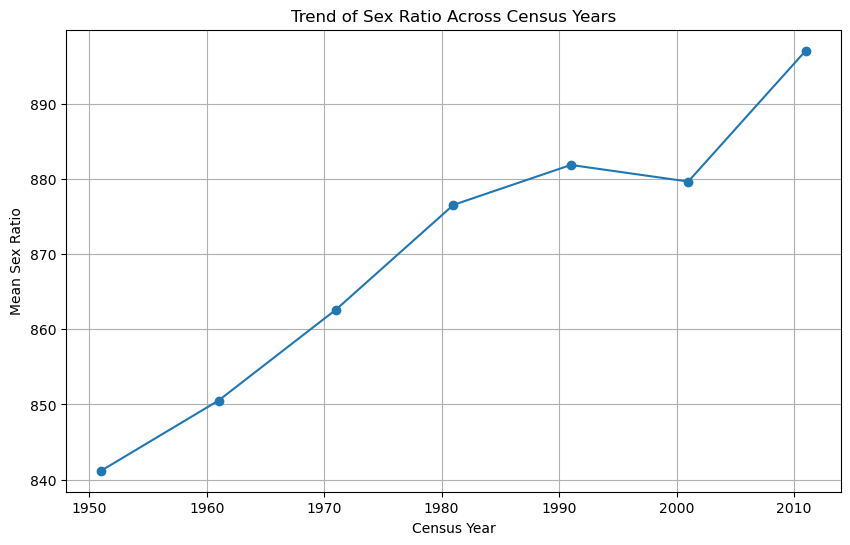

In [39]:
import matplotlib.pyplot as plt

# Calculate the mean sex ratio for each census year
mean_sex_ratio = df_sr.groupby('Census Year')['SexRatioCol'].mean()

# Plot the trend
plt.figure(figsize=(10, 6))
plt.plot(mean_sex_ratio.index, mean_sex_ratio.values, marker='o')
plt.title('Trend of Sex Ratio Across Census Years')
plt.xlabel('Census Year')
plt.ylabel('Mean Sex Ratio')
plt.grid(True)
plt.show()


### Lets see the trends in male female population across the years

In [40]:
from scipy.stats import pearsonr

In [41]:
correlation, p_value = pearsonr(df_filtered['Males'], df_filtered['Females'])

print(f"Pearson Correlation: {correlation}")
print(f"P-value: {p_value}")

if p_value <= 0.05:
    print("Reject the null hypothesis: There is a significant correlation between male and female counts.")
else:
    print("Fail to reject the null hypothesis: No significant correlation between male and female counts.")

Pearson Correlation: 0.9998726961997777
P-value: 1.0392466838436966e-224
Reject the null hypothesis: There is a significant correlation between male and female counts.
